In [1]:
import pandas as pd
import gmaps as gp

In [2]:
properati = pd.read_csv('data/properati.csv')
len(properati)

121220

In [3]:
properati.columns

Index([u'id', u'created_on', u'operation', u'property_type', u'place_name',
       u'place_with_parent_names', u'country_name', u'state_name',
       u'geonames_id', u'lat-lon', u'lat', u'lon', u'price', u'currency',
       u'price_aprox_local_currency', u'price_aprox_usd',
       u'surface_total_in_m2', u'surface_covered_in_m2', u'price_usd_per_m2',
       u'price_per_m2', u'floor', u'rooms', u'expenses', u'properati_url',
       u'description', u'title', u'image_thumbnail'],
      dtype='object')

In [37]:
#Saco algunas columnas que no parecen servir
filtrado = properati.drop( ['id','operation','title','description','image_thumbnail','properati_url','property_type',
                            'country_name','state_name','place_name','lat-lon','geonames_id'], 1)
# los geonames hacen referencia a place_name y no a la propiedad
filtrado.dropna(how='all',inplace=True)
filtrado.head(10)

,created_on,place_with_parent_names,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
0,2017-02-01,|Argentina|Capital Federal|Mataderos|,-34.661824,-58.508839,62000.0,USD,1093959.00,62000.00,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN
1,2017-02-01,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,-34.903883,-57.964330,150000.0,USD,2646675.00,150000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-02-01,|Argentina|Capital Federal|Mataderos|,-34.652262,-58.522982,72000.0,USD,1270404.00,72000.00,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN
3,2017-02-01,|Argentina|Capital Federal|Liniers|,-34.647797,-58.516424,95000.0,USD,1676227.50,95000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-02-01,|Argentina|Buenos Aires Costa Atlántica|Mar de...,-38.002626,-57.549447,64000.0,USD,1129248.00,64000.00,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN
5,2017-02-01,|Argentina|Entre Ríos|Gualeguaychú|,-33.014071,-58.519828,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN
6,2017-02-01,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,-34.532957,-58.521782,130000.0,USD,2293785.00,130000.00,106.0,78.0,1226.415094,1666.666667,NaN,NaN,NaN
7,2017-02-01,|Argentina|Capital Federal|Belgrano|,-34.559873,-58.443362,138000.0,USD,2434941.00,138000.00,45.0,40.0,3066.666667,3450.000000,NaN,NaN,NaN
8,2017-02-01,|Argentina|Capital Federal|Belgrano|,-34.559873,-58.443362,195000.0,USD,3440677.50,195000.00,65.0,60.0,3000.000000,3250.000000,NaN,NaN,NaN
9,2017-02-01,|Argentina|Santa Fe|Rosario|,-32.942031,-60.725919,460000.0,ARS,455201.45,25798.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#separo place_with_parent_names
separado = filtrado['place_with_parent_names'].apply(lambda x: pd.Series(x.split('|')))
# estaria bueno que las columnas tengan el nombre que corresponde y la 0 no tenga nombre
separado.columns = ['a','pais', 'region','localidad','ciudad','barrio','aborrar'] #mejorar
separado = separado.drop(['a','pais','aborrar'],1) # mejorar
separado.head(10)

,region,localidad,ciudad,barrio
0,Capital Federal,Mataderos,,NaN
1,Bs.As. G.B.A. Zona Sur,La Plata,,NaN
2,Capital Federal,Mataderos,,NaN
3,Capital Federal,Liniers,,NaN
4,Buenos Aires Costa Atlántica,Mar del Plata,Centro,
5,Entre Ríos,Gualeguaychú,,NaN
6,Bs.As. G.B.A. Zona Norte,Vicente López,Munro,
7,Capital Federal,Belgrano,,NaN
8,Capital Federal,Belgrano,,NaN
9,Santa Fe,Rosario,,NaN


In [39]:
#Uno las columnas nuevas en el set filtrado
filtrado = pd.concat([filtrado, separado], axis=1)
filtrado.drop('place_with_parent_names',1,inplace=True)

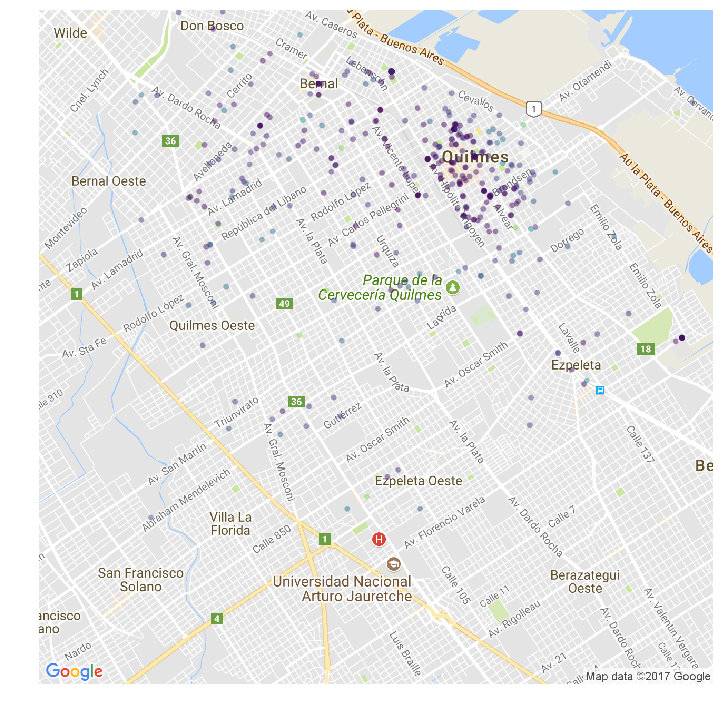

In [40]:
#solo para probar si funcionaba
cap=filtrado.loc[(filtrado['localidad'] == 'Quilmes')] 
gp.scatter(cap['lat'], cap['lon'],cap['surface_total_in_m2'])

In [59]:
propiedades_con_precio = filtrado.dropna(subset=['price'])

In [75]:
ranking_precios = propiedades_con_precio.groupby('region').mean()['price_usd_per_m2'].sort_values(ascending=False)

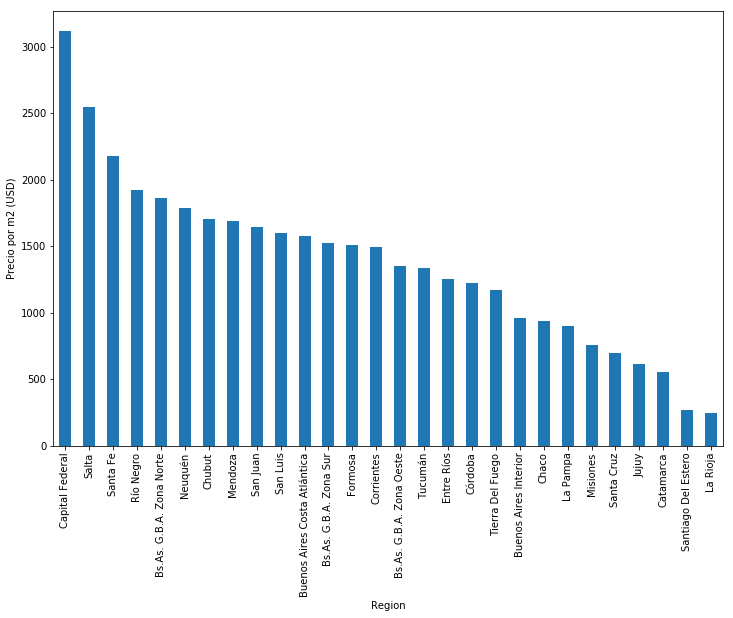

In [74]:
import matplotlib.pyplot as plt
ranking_precios.plot(kind='bar',rot=90,figsize=(12,8))
plt.xlabel('Region')
plt.ylabel('Precio por m2 (USD)')
plt.show()

In [76]:
# idea: investigar porque se dan los precios que indica el grafico anterior